In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from funciones import *

# modelamiento
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Modelo red neuronal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l2

import warnings
warnings.filterwarnings('ignore')

# Objetivos del proyecto

El siguiente análisis tiene como por objetivo generar un modelo de machine learning que permita predecir que partidas de League Of Legends has sido ganadas o perdidas.  Inlcuyendo el análisis de las diferentes variables que se detecten como priomordiales al momento de ganar una partida.

Además, estudiando todas las variables que se implican dentro de la partida, generar observaciones, conclusiones y acciones recomendadas para mejorar el rendimiento de un jugador de League Of Legends en diferentes roles.

## Descripción de variables

- **match_id** = Identificador de la partida  
- **champion** = Personaje jugado  
- **win** = Si se ganó la partida o no (1: Sí; 0: No)  
- **queue_id** = Tipo de partida (solo Flex 440)  
- **game_duration** = Duración de la partida en minutos  
- **patch** = Versión del juego en el que se realizó la partida  
- **kills** = Asesinatos realizados por el jugador en la partida  
- **deaths** = Número de veces que ha muerto el jugador en la partida  
- **assists** = Número de asistencias que ha tenido el jugador en la partida  
- **kda** = KDA obtenido por el jugador en la partida. (Asesinatos + Asistencias) / Muertes  
- **role** = Rol del campeón que jugó en la partida el jugador (Mid, Top, Bot-adc, utilidad)  
- **lane** = Línea en la que se jugó mayoritariamente durante la partida (JUNGLE, MIDDLE, NONE, BOTTOM, TOP)
- **gold_earned** = Oro obtenido  
- **gold_spent** = Oro gastado  
- **total_minions** = Total de minions asesinados  
- **neutral_minions** = Total de monstruos neutrales asesinados  
- **total_damage** = Daño total infligido  
- **physical_damage** = Total del daño físico infligido  
- **magic_damage** = Total del daño mágico infligido  
- **true_damage** = Total del daño verdadero infligido  
- **damage_taken** = Total de daño recibido  
- **damage_healed** = Total de curación  
- **vision_score** = Puntuación de visión  
- **wards_placed** = Wards utilizados  
- **wards_killed** = Wards destruidos  
- **vision_wards** = Wards comprados  
- **turret_kills** = Torretas destruidas  
- **inhibitor_kills** = Inhibidores destruidos  
- **dragon_kills** = Dragones asesinados  
- **baron_kills** = Barones asesinados  
- **rift_herald_kills** = Heraldos asesinados  
- **item_0** = Item en la casilla 1  
- **item_1** = Item en la casilla 2   
- **item_2** = Item en la casilla 3  
- **item_3** = Item en la casilla 4    
- **item_4** = Item en la casilla 5 
- **item_5** = Item en la casilla 6   
- **item_6** = Item en la casilla 7    
- **primary_rune_tree** = Runa principal utilizada  
- **secondary_rune_tree** = Runa secundaria utilizada  
- **rune_0_0** = Primera runa rama principal  
- **rune_0_1** = Segunda runa rama principal  
- **rune_0_2** = Tercera runa rama principal  
- **rune_0_3** = Cuarta runa rama principal  
- **rune_1_0** = Primera runa rama secundaria  
- **rune_1_1** = Segunda runa rama secundaria  

# Exploración de los datos

In [2]:
data_riot_flex = pd.read_excel("BD_Flex.xlsx")
data_riot_soloq = pd.read_excel("BD_soloQ.xlsx")
data_riot = pd.concat([data_riot_flex, data_riot_soloq], ignore_index=True)
df_base = data_riot.copy()
df_base

,match_id,champion,win,queue_id,game_duration,patch,kills,deaths,assists,kda,...,item_5,item_6,primary_rune_tree,secondary_rune_tree,rune_0_0,rune_0_1,rune_0_2,rune_0_3,rune_1_0,rune_1_1
0,LA2_1476457036,Blitzcrank,1,440,34,14.24.644.2327,5,6,23,4.666667e+15,...,2504,3364,8300,8200,8351,8306,8345,8347,8234,8275
1,LA2_1476464452,Morgana,1,440,31,14.24.644.2327,5,8,14,2.375000e+03,...,6653,3364,8200,8300,8229,8226,8210,8237,8347,8345
2,LA2_1476660680,Viego,0,440,38,14.24.644.2327,8,13,3,8.461538e-01,...,2019,3364,8000,8300,8010,9111,9104,8014,8347,8304
3,LA2_1487034715,Hecarim,0,440,38,15.3.656.4086,3,12,12,1.250000e+00,...,1037,3364,8200,8000,8230,8275,8234,8232,9105,9111
4,LA2_1487041594,Sejuani,1,440,27,15.3.656.4086,4,2,10,7.000000e+00,...,0,3364,8400,8000,8439,8463,8429,8451,9104,9111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,LA2_1522282586,Trundle,1,420,31,15.15.701.6241,8,5,14,4.400000e+00,...,0,3364,8000,8300,8005,9111,9104,8014,8410,8304
315,LA2_1522475460,Trundle,1,420,28,15.15.701.6241,8,2,12,1.000000e+01,...,3174,3364,8000,8300,8005,9111,9104,8014,8410,8304
316,LA2_1522484076,Trundle,0,420,24,15.15.701.6241,0,6,2,3.333333e-01,...,0,3364,8000,8300,8005,9111,9104,8014,8410,8304
317,LA2_1522692779,Trundle,1,420,20,15.15.701.6241,8,2,3,5.500000e+00,...,3078,3364,8000,8300,8005,9111,9104,8014,8410,8304


In [3]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             319 non-null    object 
 1   champion             319 non-null    object 
 2   win                  319 non-null    int64  
 3   queue_id             319 non-null    int64  
 4   game_duration        319 non-null    int64  
 5   patch                319 non-null    object 
 6   kills                319 non-null    int64  
 7   deaths               319 non-null    int64  
 8   assists              319 non-null    int64  
 9   kda                  319 non-null    float64
 10  role                 319 non-null    object 
 11  lane                 319 non-null    object 
 12  gold_earned          319 non-null    int64  
 13  gold_spent           319 non-null    int64  
 14  total_minions        319 non-null    int64  
 15  neutral_minions      319 non-null    int

In [4]:
null = df_base.isna().sum().values
col = df_base.columns
df_nulos = pd.DataFrame({
    'Columna': col,
    'Nulos': null})
df_nulos

,Columna,Nulos
0,match_id,0
1,champion,0
2,win,0
3,queue_id,0
4,game_duration,0
5,patch,0
6,kills,0
7,deaths,0
8,assists,0
9,kda,0


**Observaciones** 
- No existen valores nulos en ninguna columna del dataframe
- No es necesario tratamiento de valores nulos o perdidos

In [5]:
'''
Reducimos la cantidad de campeones según la cantidad de veces que lo usamos. 
Cambiamos algunos campeones a 'otros' para reducir dimensionalidad luego del OHE 
'''

# Aplicamos el cambio de etiquetas
champ_counts = df_base['champion'].value_counts()
df_base['champ'] = df_base['champion'].apply(lambda x: x if champ_counts[x] >= 2 else 'Otro')
df_base = df_base.drop(columns=['champion'])

# Creamos una columna que calcule el total de monstruos y minions asesinados por minuto
df_base['CS_per_min'] = (df_base['total_minions']+ df_base['neutral_minions']) / df_base['game_duration']

# Creamos una columna que calcule la cantidad de wards colocados por minuto en base a los wards colocados y la duración del juego
df_base['wards_per_min'] = df_base['wards_placed'] / df_base['game_duration']

# Crear columnas binarias según si existe item en cada ranura y obtener el total de items comprados (1 si hay item, 0 si no)
for i in range(7): 
    df_base[f'tiene_item_{i}'] = (df_base[f'item_{i}'] != 0).astype(int)

# Crear columna con la cantidad total de ítems comprados en la partida
df_base['num_items'] = df_base[[f'tiene_item_{i}' for i in range(7)]].sum(axis=1)

# Eliminar las columnas auxiliares has_item
df_base = df_base.drop(columns=[f'tiene_item_{i}' for i in range(7)])

# Eliminamos el Id del partidos y el tipo de partida dado que no es relevante para el análisis
df_base = df_base.drop(columns = ['match_id','queue_id','patch','rift_herald_kills','lane'])

# Quitamos los registros de partidas con duración menor a 5 minutos debido a un potencial remake e información inutil para el análisis
rmk = len(df_base[df_base['game_duration'] < 3])
print(f'Existen {rmk} juegos terminados antes del minuto 3 de juego.')
df_base = df_base[df_base['game_duration'] > 3]
print(f'Se quitaron {rmk} registros. Quedan {len(df_base)} partidas a analizar.')

df_pivot = df_base.copy()

# Generamos columnas dummies de rol y champ para poder usar dicha información dentro de los modelos.
df_base = pd.get_dummies(df_base, columns=['champ','role'], drop_first=True, dtype=int)

# Dejamos la columna victoria al final y quitamos la columna lane
df_base['victoria'] = df_base['win']
df_base = df_base.drop(columns=['win'])


Existen 5 juegos terminados antes del minuto 3 de juego.
Se quitaron 5 registros. Quedan 313 partidas a analizar.


**Observaciones** 
- Cambio de etiquetas de los campeones para reducir dimensionalidad
- Se crea una columna para saber el total de items comprados
- Se crea una columna con el total de cs por min
- Se crea una columna con el total de wards colocados por min
- Se hace OHE de los campeones y roles
- Se eliminan los registros que corresponden a REMAKES (partidas que no se llevan a cabo porque un jugador no entró a la partida)

# Análisis Exploratorio

In [6]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 0 to 318
Data columns (total 78 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_duration        313 non-null    int64  
 1   kills                313 non-null    int64  
 2   deaths               313 non-null    int64  
 3   assists              313 non-null    int64  
 4   kda                  313 non-null    float64
 5   gold_earned          313 non-null    int64  
 6   gold_spent           313 non-null    int64  
 7   total_minions        313 non-null    int64  
 8   neutral_minions      313 non-null    int64  
 9   total_damage         313 non-null    int64  
 10  physical_damage      313 non-null    int64  
 11  magic_damage         313 non-null    int64  
 12  true_damage          313 non-null    int64  
 13  damage_taken         313 non-null    int64  
 14  damage_healed        313 non-null    int64  
 15  vision_score         313 non-null    int64  


In [7]:
df_base['victoria'].value_counts()

victoria
0    159
1    154
Name: count, dtype: int64

**Observaciones** 
- No existe desbalanceo significativo de clases, no es necesario balancearlas.

## Análisis rendimiento del jugador 

Basándonos en las estadísticas recopiladas por **ORACLES ELIXIR y LEAGUE OF GRAPHS**, podemos obtener difentes métricas de las partidas de todas las ligas de League of Legends. Es en relación a dichas métricas que podemos comparar el rendimiento promedio de los jugadores profesionales con el mio.

## Análisis del jugador:  Games por rol

In [8]:
games_per_rol = df_pivot.pivot_table(
    values='wards_per_min',
    index='role',
    aggfunc='count',
    margins= True
)
games_per_rol = games_per_rol.rename(columns={'wards_per_min': 'Games totales por rol'})

games_per_rol

,Games totales por rol
role,
BOTTOM,64
JUNGLE,114
MIDDLE,21
TOP,50
UTILITY,64
All,313


## Análisis del jugador:  Wards colocados por minuto

In [9]:
tabla_wards = df_pivot.pivot_table(
    values='wards_placed',
    index='role',
    aggfunc='mean'
)

tabla_wards

,wards_placed
role,
BOTTOM,11.187500
JUNGLE,5.324561
MIDDLE,12.523810
TOP,11.140000
UTILITY,31.406250


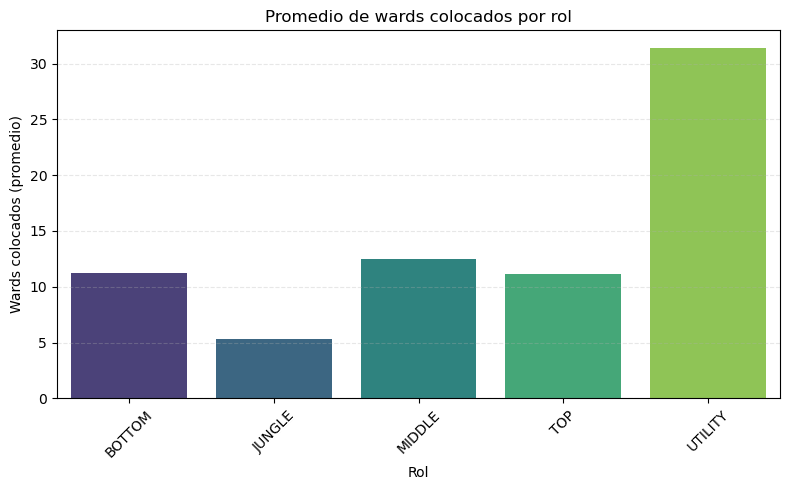

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(data=tabla_wards, x='role', y='wards_placed', palette='viridis')

# Personalizar
plt.title('Promedio de wards colocados por rol')
plt.xlabel('Rol')
plt.ylabel('Wards colocados (promedio)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
tabla_wards_per_min = df_pivot.pivot_table(
    values='wards_per_min',
    index='role',
    aggfunc='mean'
)

tabla_wards_per_min = tabla_wards_per_min.rename(columns={'wards_per_min': 'WPM según el Rol'})
tabla_wards_per_min

,WPM según el Rol
role,
BOTTOM,0.359136
JUNGLE,0.179044
MIDDLE,0.451663
TOP,0.372920
UTILITY,1.020591


**Observaciones** 
- Al obtener la cantidad de wards por minuto logramos visualizar el promedio de wards colocados en cada rol jugado. Al compararlo según la data de Oracles Elixir podemos detectar la diferencia en la colocación de centinelas de visión entre los jugadores profesionales y el jugador analizado.

Promedio de centinelas de visión por minutos de jugadores profesionales según el rol:
| Rol     | Bueno (WPM) | Excelente (WPM) |
| ------- | ----------- | --------------- |
| Bottom  | >0.4        | >0.5            |
| Jungle  | >0.45       | >0.7            |
| Middle  | >0.4        | >0.6            |
| Top     | >0.4        | >0.5            |
| Utility | >2.0        | >2.5            |

Al ver la cantidad de partidas por cada rol, el rol más jugado es jungla, por lo que es el más idóneo para comparar, dando un rendimiento en tando a wards por minuto muy por bajo de la media, solo de 0.2 versus el 0,45 en promedio a nivel profesional, lo que implica una necesaria mejora en esta materia.

Sin embargo, los promedios a nivel no profesional son los siguientes (source: League of graphs):

| Rol     | WPM  |
| ------- | ---- |
| Bottom     | 0.29 |
| Jungle  | 0.20 |
| Mid     | 0.31 |
| Top     | 0.29 |
| UTILITY | 0.92 |

Por lo tanto, a nivel no profesional, los niveles actuales del jugador analizado, están acorde al nivel global de WPM.
En resumen, para un nivel profesional, se debe mejorar aún los wards por minuto pero a nivel no profesional, está dentro de los rangos esperados.

## Análisis del jugador: KDA 

In [12]:
tabla_kda = df_pivot.pivot_table(
    values='kda',
    index='role',
    aggfunc='mean'
)

kda_prof = {
    'BOTTOM': 4.58,
    'JUNGLE': 3.56,
    'MIDDLE': 4.02,
    'TOP': 2.85,
    'UTILITY': 2.91}

# Correcta asignación
tabla_kda['KDA profesional'] = tabla_kda.index.map(kda_prof)

kda_x = {
    'BOTTOM': 2,
    'JUNGLE': 3,
    'MIDDLE': 1.75,
    'TOP': 1.25,
    'UTILITY': 2.25}

# Correcta asignación
tabla_kda['KDA promedio'] = tabla_kda.index.map(kda_x)

tabla_kda = tabla_kda.rename(columns = {'kda':'KDA del jugador'})
tabla_kda

,KDA del jugador,KDA profesional,KDA promedio
role,,,
BOTTOM,6.233478e+15,4.58,2.00
JUNGLE,3.682052e+15,3.56,3.00
MIDDLE,4.391534e+15,4.02,1.75
TOP,3.210000e+15,2.85,1.25
UTILITY,7.489583e+15,2.91,2.25


**Observaciones** 

- Dado que el número de partidas en el rol de jungla es más alto, el análisis con mayor representatividad es el de jungla. Por ende, podemos decir con mejor precisión que el KDA (relación entre asesinatos, asistencias y muertes) es bastante bueno en comparación a los KDA de profesionales y superior al promedio de los jugadores.

## Análisis del jugador: Minions asesinados 

In [13]:
tabla_CSPM = df_pivot.pivot_table(
    values='CS_per_min',
    index='role',
    aggfunc='mean'
)

CSPM_prof = {
    'BOTTOM': 9.71,
    'JUNGLE': 5.97,
    'MIDDLE': 8.71,
    'TOP': 7.85,
    'UTILITY': 1.11}

# Correcta asignación
tabla_CSPM['CSPM profesional'] = tabla_CSPM.index.map(CSPM_prof)

CSPM_x = {
    'BOTTOM': 7.3,
    'JUNGLE': 6.1,
    'MIDDLE': 6.8,
    'TOP': 6.6,
    'UTILITY': 1.8}

# Correcta asignación
tabla_CSPM['CSPM promedio'] = tabla_CSPM.index.map(CSPM_x)

tabla_CSPM = tabla_CSPM.rename(columns = {'CS_per_min':'CSPM del jugador'})
tabla_CSPM

,CSPM del jugador,CSPM profesional,CSPM promedio
role,,,
BOTTOM,6.635431,9.71,7.3
JUNGLE,5.844492,5.97,6.1
MIDDLE,6.225679,8.71,6.8
TOP,6.679955,7.85,6.6
UTILITY,1.154852,1.11,1.8


**Observaciones** 

- Al igual que en los casos de análisis anteriores, el rol de jungla será el principalmente analizado por la cantidad de representatividad que tiene. Teniendo esto en consideración podemos evidenciar que los mosntruos totales asesinados por minuto es similar al promedio profesional y al promedio general de los jugadores amateur. En este sentido, el farmeo, si bien puede mejorar, está en rangos óptimos o esperables. Sin embargo, en los otros roles el jugador no tiene un muy buen desempeño, por lo que se debe de practicar esta mecanica parallegar a niveles más óptimos, por lo menos similares al promedio de jugadores amateur de cada rol.

# Correlaciones y Reducción de variables

In [14]:
#Vemos la correlaciones más altas
obtener_pares_correlacionados(df_base)

,Variable 1,Variable 2,Correlación
0,gold_earned,gold_spent,0.972581
1,wards_placed,wards_per_min,0.958728
2,neutral_minions,role_JUNGLE,0.949129
3,CS_per_min,role_UTILITY,-0.902629
4,vision_score,wards_placed,0.892937
5,wards_per_min,role_UTILITY,0.856484
6,gold_earned,total_damage,0.837172
7,gold_spent,total_damage,0.824769
8,vision_score,wards_per_min,0.817111
9,primary_rune_tree,rune_0_3,0.805019


**Observaciones** 

Quitamos las variables con demasiada correlación entre si y que puedan causar multicolinealidad dado que pueden afectar demasiado en el modelo.

In [15]:
df_reducido = df_base.drop(columns = ['total_minions',
                                    'primary_rune_tree',
                                    'secondary_rune_tree',
                                    'gold_spent',
                                    'wards_placed',
                                    'vision_wards',
                                    'neutral_minions',
                                    'physical_damage',
                                    'true_damage',
                                    'magic_damage',
                                    'damage_healed',
                                    'kills',
                                    'deaths',
                                    'assists'
                                   ])

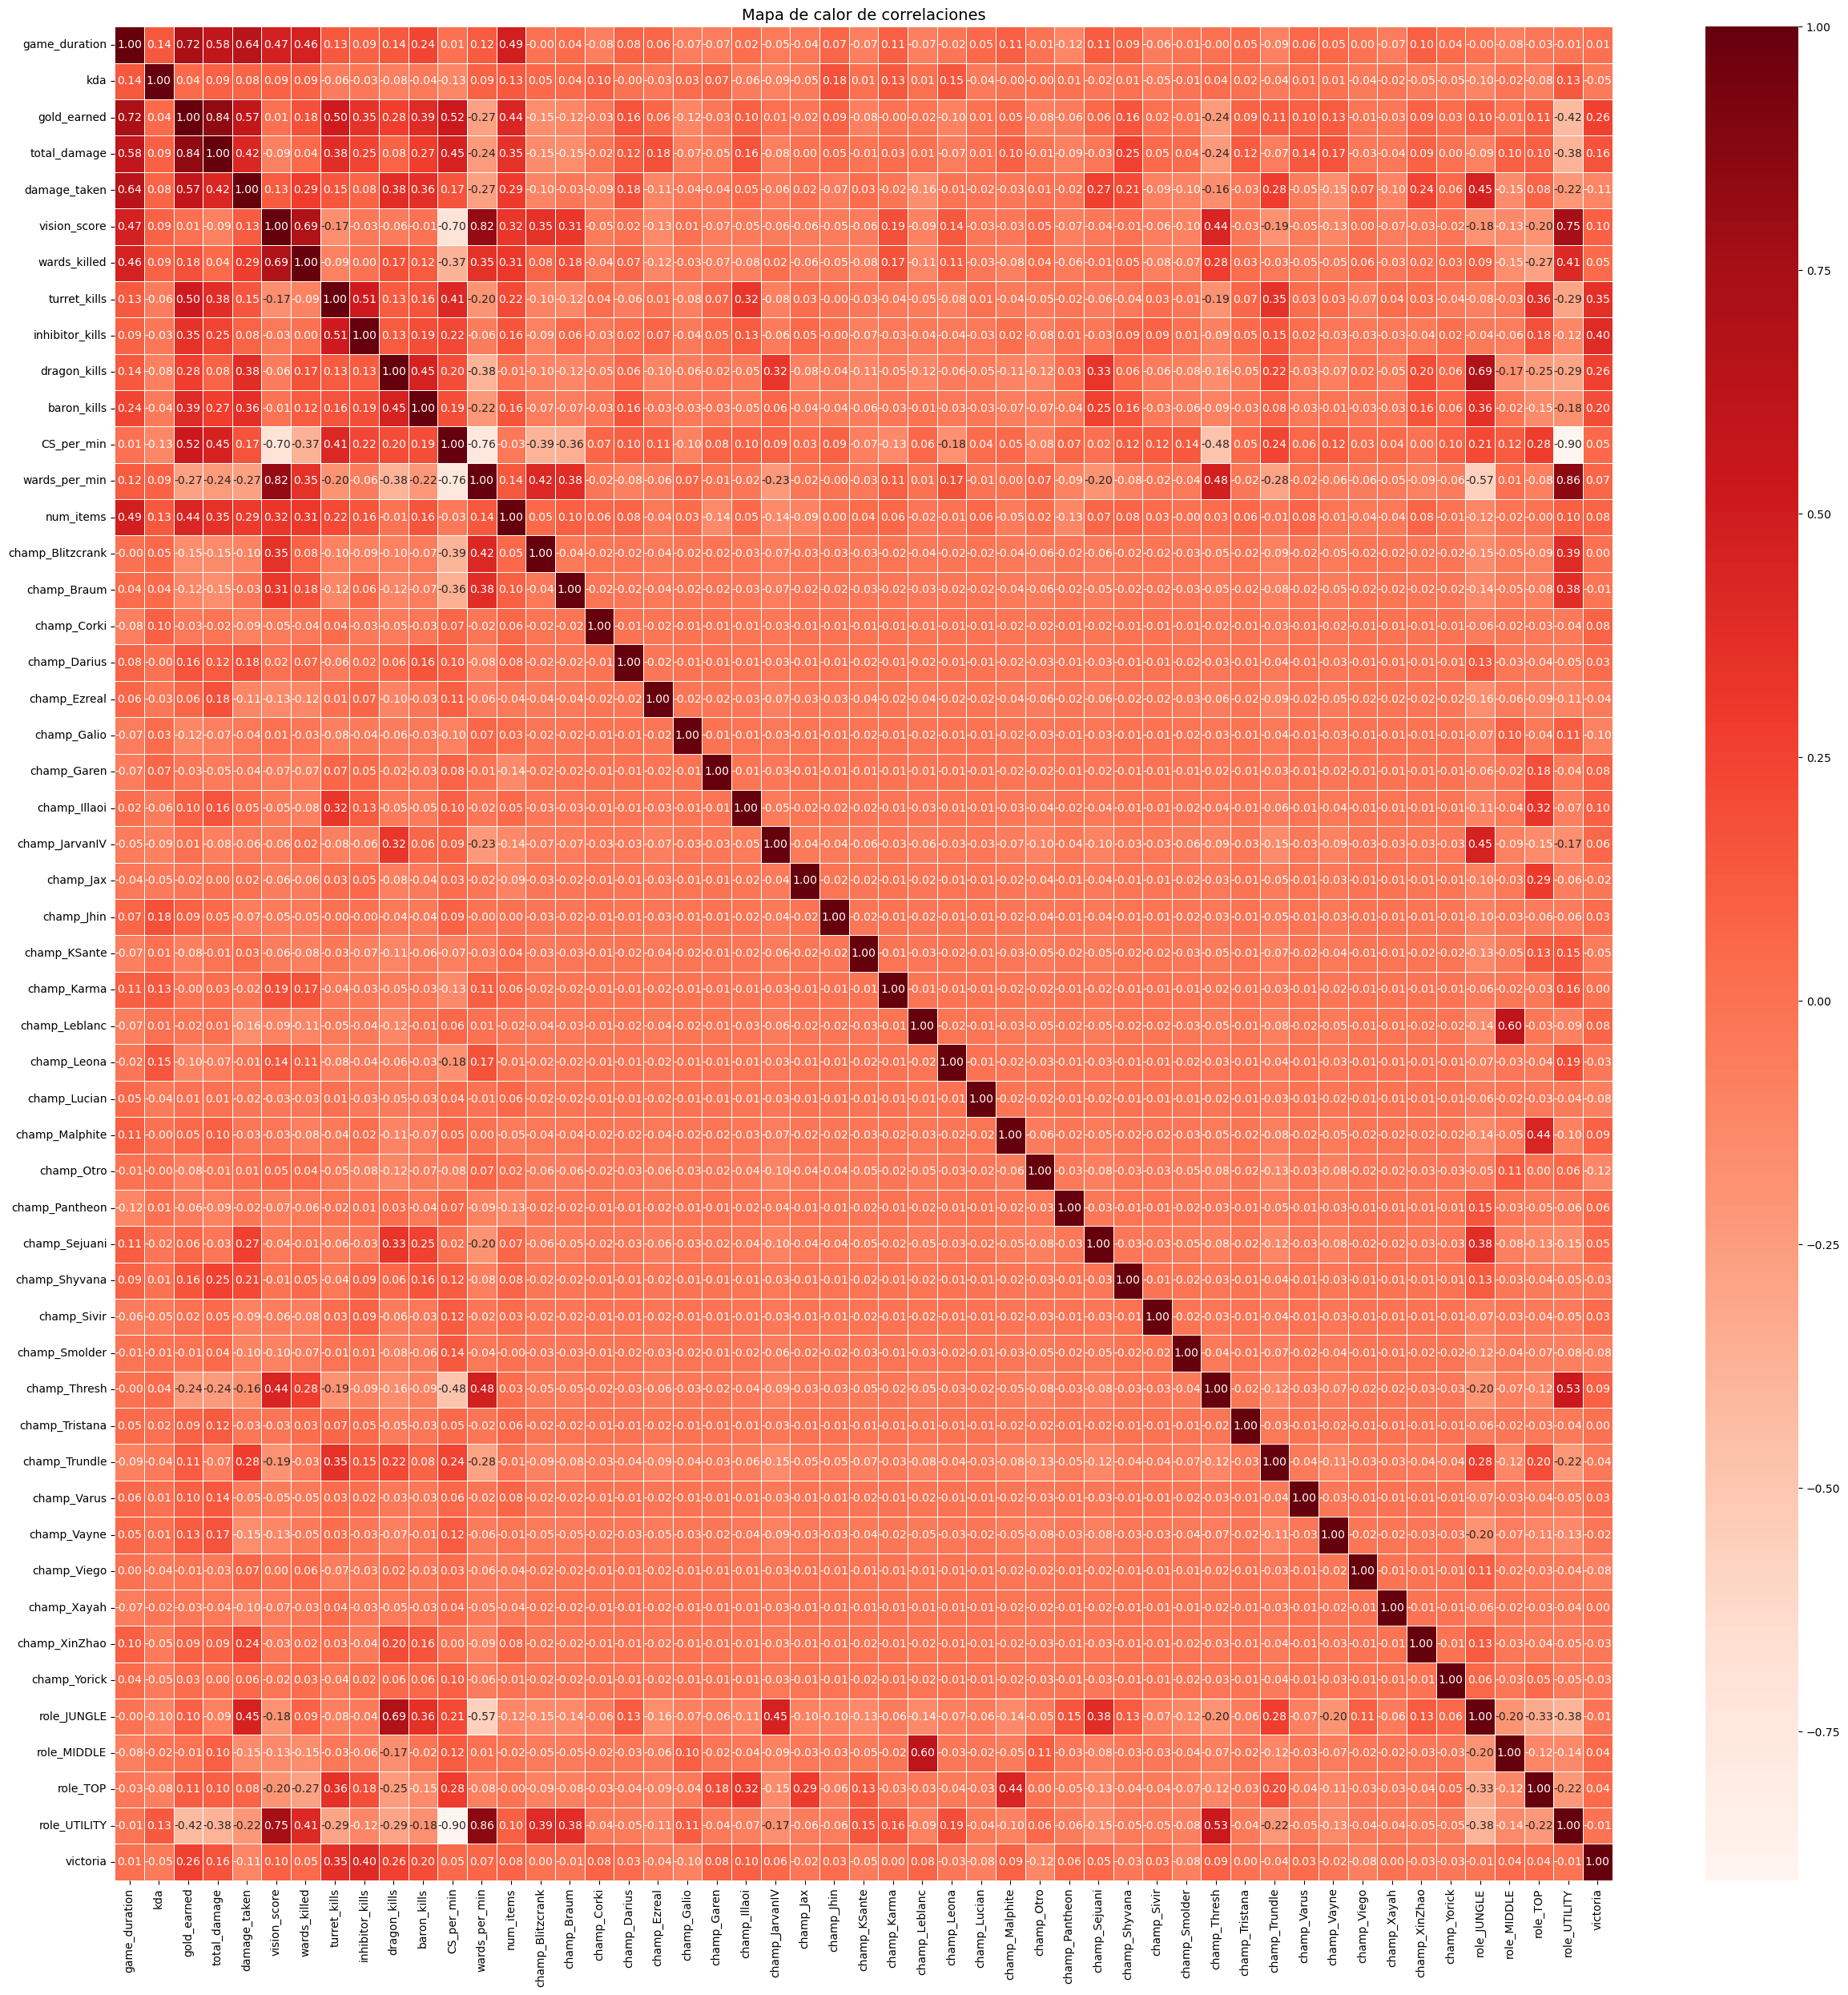

In [16]:
excluir =  ['item_0',
           'item_1',
           'item_2',
           'item_3',
           'item_4',
           'item_5',
           'item_6',
           'rune_0_0',
           'rune_0_1',
           'rune_0_2',
           'rune_0_3',
           'rune_1_0',
           'rune_1_1'] # Dejamos en el heatmap solo las variables numéricas
heatmap = df_reducido.drop(columns = excluir)

# Heatmap de todas las variables
plt.figure(figsize=(25, 25))
sns.heatmap(heatmap.corr(), annot=True, fmt=".2f", cmap="Reds", linewidths=0.7)
plt.title("Mapa de calor de correlaciones", fontsize=14)
plt.tight_layout()
plt.show()

In [17]:
# Obseervamos las mayores correlaciones nuevamente
obtener_pares_correlacionados(df_reducido)

,Variable 1,Variable 2,Correlación
0,CS_per_min,role_UTILITY,-0.902629
1,wards_per_min,role_UTILITY,0.856484
2,gold_earned,total_damage,0.837172
3,vision_score,wards_per_min,0.817111
4,CS_per_min,wards_per_min,-0.759491
5,vision_score,role_UTILITY,0.750544
6,game_duration,gold_earned,0.718169
7,rune_1_0,rune_1_1,0.704267


**Observaciones** 

Podemos ver correlaciones interesantes como: 
- La cantidad de assitencias aumenta según wards utilizados
- La cantidad de monstruos asesinados aumenta según la visión.
- El kda empeora a lo largo de la partida
- Mejora levemente el asesinato de dragones según la visión.

# Modelos

## Spliteo de datos

In [18]:
X = df_reducido.drop(columns = ['victoria'])
y = df_reducido['victoria']

# Spliteamos
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
# Estandarizamos los datos para que todos tengan la misma medida
X_train_scaled, X_test_scaled  = scaler(df_reducido,X_train, X_test,'victoria')


📋 Columnas del DataFrame:
0: game_duration
1: kda
2: gold_earned
3: total_damage
4: damage_taken
5: vision_score
6: wards_killed
7: turret_kills
8: inhibitor_kills
9: dragon_kills
10: baron_kills
11: item_0
12: item_1
13: item_2
14: item_3
15: item_4
16: item_5
17: item_6
18: rune_0_0
19: rune_0_1
20: rune_0_2
21: rune_0_3
22: rune_1_0
23: rune_1_1
24: CS_per_min
25: wards_per_min
26: num_items
27: champ_Blitzcrank
28: champ_Braum
29: champ_Corki
30: champ_Darius
31: champ_Ezreal
32: champ_Galio
33: champ_Garen
34: champ_Illaoi
35: champ_JarvanIV
36: champ_Jax
37: champ_Jhin
38: champ_KSante
39: champ_Karma
40: champ_Leblanc
41: champ_Leona
42: champ_Lucian
43: champ_Malphite
44: champ_Otro
45: champ_Pantheon
46: champ_Sejuani
47: champ_Shyvana
48: champ_Sivir
49: champ_Smolder
50: champ_Thresh
51: champ_Tristana
52: champ_Trundle
53: champ_Varus
54: champ_Vayne
55: champ_Viego
56: champ_Xayah
57: champ_XinZhao
58: champ_Yorick
59: role_JUNGLE
60: role_MIDDLE
61: role_TOP
62: role_UTI


Ingresa los índices de las columnas que NO quieres escalar, separados por comas:  11,12,13,14,15,16,17,18,19,20,21,22,23,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62


Columnas excluidas (sin escalar): ['item_0', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'item_6', 'rune_0_0', 'rune_0_1', 'rune_0_2', 'rune_0_3', 'rune_1_0', 'rune_1_1', 'champ_Blitzcrank', 'champ_Braum', 'champ_Corki', 'champ_Darius', 'champ_Ezreal', 'champ_Galio', 'champ_Garen', 'champ_Illaoi', 'champ_JarvanIV', 'champ_Jax', 'champ_Jhin', 'champ_KSante', 'champ_Karma', 'champ_Leblanc', 'champ_Leona', 'champ_Lucian', 'champ_Malphite', 'champ_Otro', 'champ_Pantheon', 'champ_Sejuani', 'champ_Shyvana', 'champ_Sivir', 'champ_Smolder', 'champ_Thresh', 'champ_Tristana', 'champ_Trundle', 'champ_Varus', 'champ_Vayne', 'champ_Viego', 'champ_Xayah', 'champ_XinZhao', 'champ_Yorick', 'role_JUNGLE', 'role_MIDDLE', 'role_TOP', 'role_UTILITY']

Columnas escaladas: ['CS_per_min', 'baron_kills', 'damage_taken', 'dragon_kills', 'game_duration', 'gold_earned', 'inhibitor_kills', 'kda', 'num_items', 'total_damage', 'turret_kills', 'vision_score', 'wards_killed', 'wards_per_min']


## Regresión logistica

In [20]:
model_log = LogisticRegression(random_state=42)
model_log.fit(X_train_scaled, y_train)
y_pred_log = model_log.predict(X_test_scaled)

### Matríz de confusión de la regresión logística

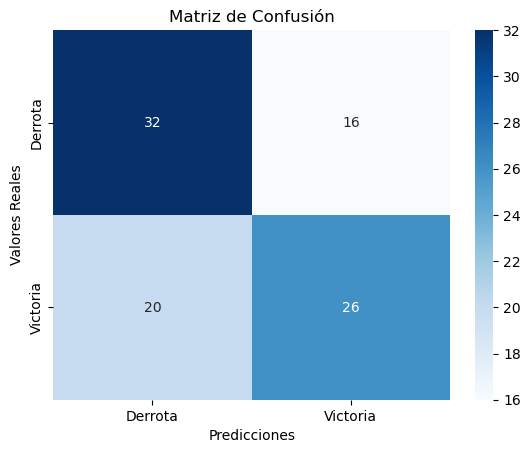


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        48
           1       0.62      0.57      0.59        46

    accuracy                           0.62        94
   macro avg       0.62      0.62      0.62        94
weighted avg       0.62      0.62      0.62        94



In [21]:
# Crear un heatmap de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_log)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Derrota', 'Victoria'], yticklabels=['Derrota', 'Victoria'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_log))

**Observaciones** 
- A pesar de existen varios falsos positivos y verdaderos negativos, en general tenemos un rendimiento del modelo "aceptable", dado que su ocuraccy es mayor al 50% lo que significa que es a lo menos un 10% mejor que el azar.
- El modelo detecta un poco mejor las derrotas que las victorias en f1-score.
- El rendimiento general del modelo es de un 63%

### Curva ROC-AUC de la regresión logística

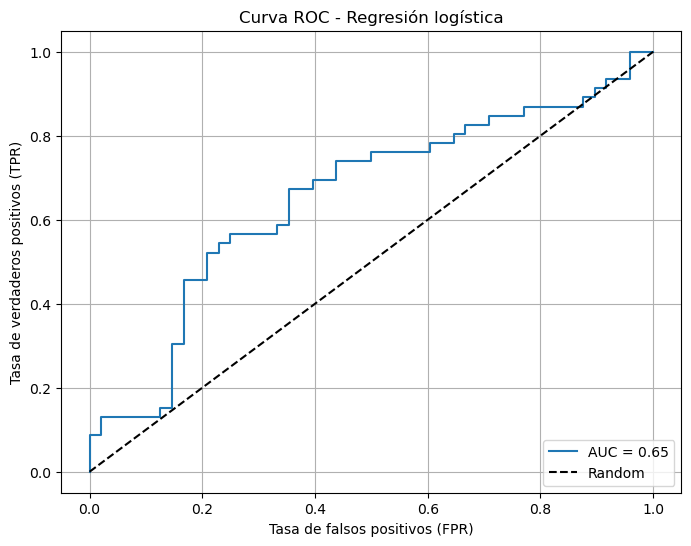

In [22]:
y_pred_prob = model_log.predict_proba(X_test_scaled)[:, 1]

# 2. Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# 3. Calcular AUC
auc_score = roc_auc_score(y_test, y_pred_prob)

# 4. Graficar
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Regresión logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Observaciones** 
- El valor AUC aún es levemente mejo que el azar y el modelo no detecta muy bien entre TPR y FPR

## Support Vector Machine con ajuste de hiperparámetros

In [23]:
# Definir el modelo base
svm_model = SVC(random_state=42)

# Rango de parámetros a probar
param_grid_svm = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1]
}

# Configurar búsqueda
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar
grid_search_svm.fit(X_train_scaled, y_train)

# Mejor modelo
best_svm = grid_search_svm.best_estimator_
print("Mejores parámetros:", grid_search_svm.best_params_)


Mejores parámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


### Matríz de confusión de SVM

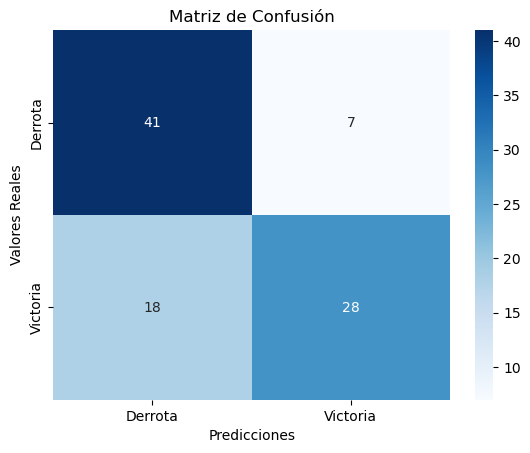


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.69      0.85      0.77        48
           1       0.80      0.61      0.69        46

    accuracy                           0.73        94
   macro avg       0.75      0.73      0.73        94
weighted avg       0.75      0.73      0.73        94



In [24]:
y_pred_svm = best_svm.predict(X_test_scaled)

# Crear un heatmap de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Derrota', 'Victoria'], yticklabels=['Derrota', 'Victoria'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_svm))

### Curva ROC-AUC de SVM

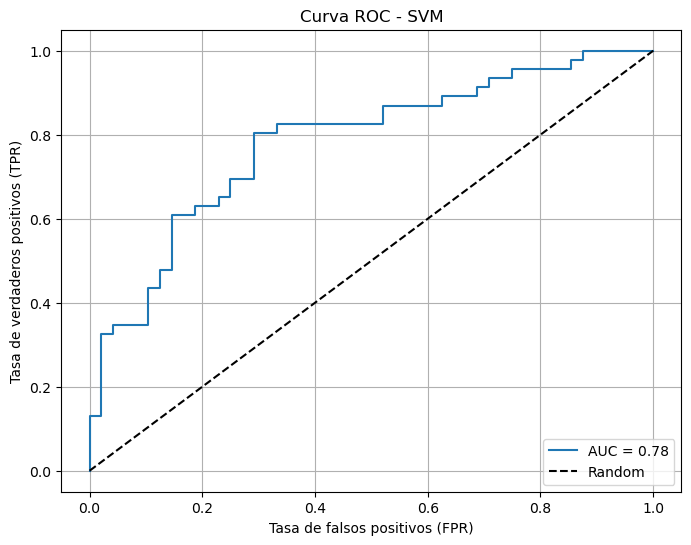

In [25]:
# Obtén los scores con decision_function
y_scores_svm = best_svm.decision_function(X_test_scaled)

# Calcula ROC y AUC usando estos scores
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svm)
auc = roc_auc_score(y_test, y_scores_svm)

# 4. Graficar
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Decision Tree con ajuste de hiperparámetros

In [25]:
# 3. Definir el modelo base
dt_model = DecisionTreeClassifier()

# 4. Definir la grilla de hiperparámetros
param_grid_dt = {
    'max_depth': [None, 3, 5, 10],                 # profundidad máxima
    'min_samples_split': [2, 5, 10],               # mínimo para dividir nodo
    'min_samples_leaf': [1, 2, 4],                 # mínimo por hoja
}

# GridSearch con validación cruzada
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar
grid_search_dt.fit(X_train_scaled, y_train)

# Mejor modelo
best_dt = grid_search_dt.best_estimator_
print("Mejores parámetros:", grid_search_dt.best_params_)

Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


### Matríz de confusión de Decision Tree

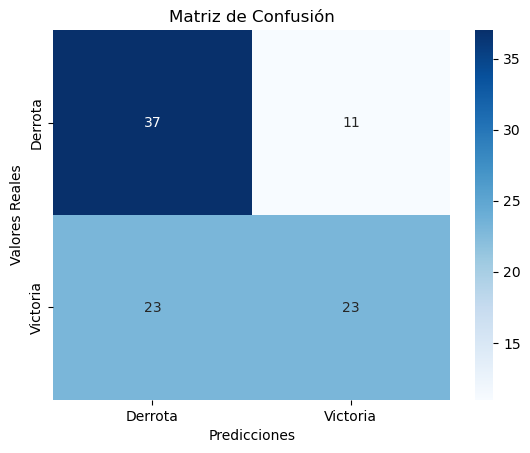


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        48
           1       0.68      0.50      0.57        46

    accuracy                           0.64        94
   macro avg       0.65      0.64      0.63        94
weighted avg       0.65      0.64      0.63        94



In [26]:
y_pred_dt = best_dt.predict(X_test_scaled)

# Crear un heatmap de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Derrota', 'Victoria'], yticklabels=['Derrota', 'Victoria'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt))

### Curva ROC-AUC de decition tree

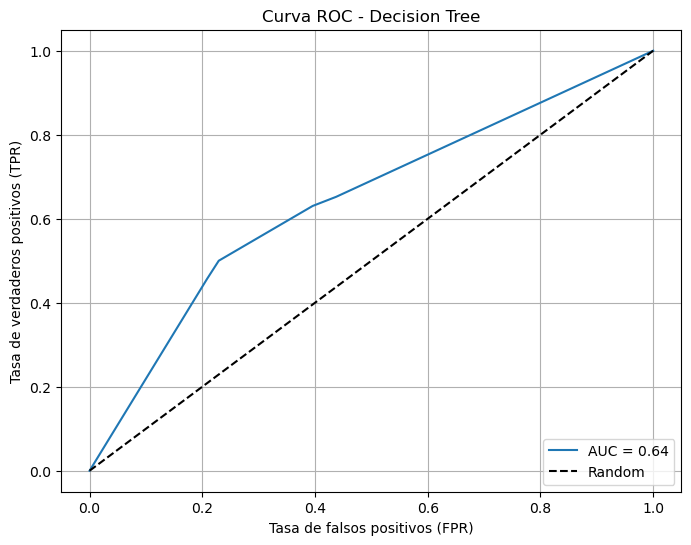

In [27]:
# Probabilidad de la clase positiva (1, por ejemplo "victoria")
y_probs_dt = best_dt.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_dt)
auc = roc_auc_score(y_test, y_probs_dt)

# 4. Graficar
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Random Forest con ajuste de hiperparámetros

In [28]:
model_rf = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],      # número de árboles
    'max_depth': [None, 3, 5, 10, 20, 30],   # profundidad máxima
    'min_samples_split': [2, 5, 10],         # mínimo para dividir nodo
    'min_samples_leaf': [1, 2, 4],           # mínimo por hoja
}

# GridSearch con validación cruzada
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar
grid_search_rf.fit(X_train_scaled, y_train)

# Mejor modelo
best_rf = grid_search_rf.best_estimator_
print("Mejores parámetros:", grid_search_rf.best_params_)

Mejores parámetros: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


### Matríz de confusión de Random Forest

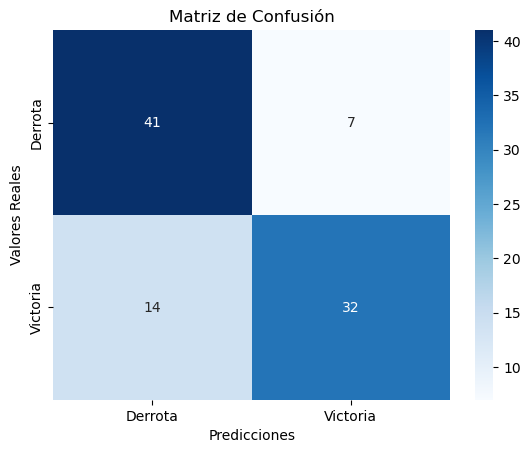


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        48
           1       0.82      0.70      0.75        46

    accuracy                           0.78        94
   macro avg       0.78      0.77      0.77        94
weighted avg       0.78      0.78      0.77        94



In [29]:
y_pred_rf = best_rf.predict(X_test_scaled)

# Crear un heatmap de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Derrota', 'Victoria'], yticklabels=['Derrota', 'Victoria'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

### Curva ROC-AUC de Random Forest

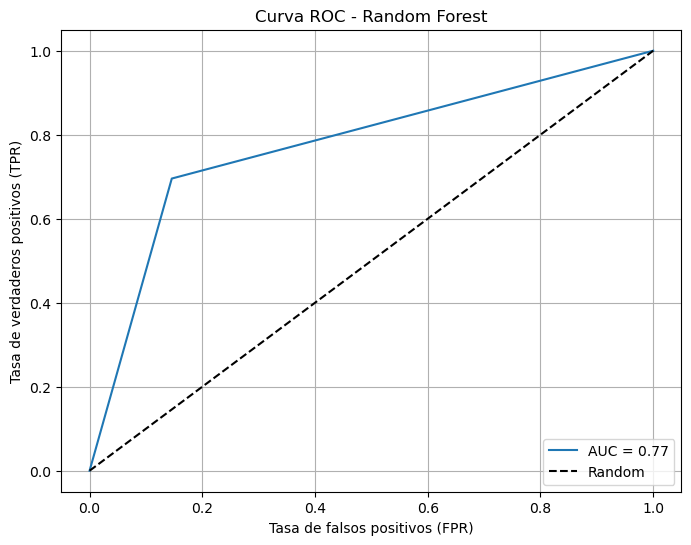

In [30]:
# Probabilidad de la clase positiva (1, por ejemplo "victoria")
y_probs_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_pred_rf)

# 4. Graficar
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Red neuronal

In [31]:
# Crear modelo
model_mlp = Sequential([
    Dense(32, activation='relu', kernel_initializer=HeNormal(),
          kernel_regularizer=l2(0.001), use_bias=True,
          bias_initializer='zeros', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),

    Dense(16, activation='relu', kernel_initializer=HeNormal(),
          kernel_regularizer=l2(0.001), use_bias=True,
          bias_initializer='zeros'),
    Dropout(0.3),

    Dense(8, activation='relu', kernel_initializer=HeNormal(),
          kernel_regularizer=l2(0.001), use_bias=True,
          bias_initializer='zeros'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # salida binaria
])

model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,721 (10.63 KB)

 Trainable params: 2,721 (10.63 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compilar
model_mlp.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar
history = model_mlp.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=50,
                    batch_size=32,
                    verbose=1)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5297 - loss: 1223.0127 - val_accuracy: 0.5638 - val_loss: 57.5116
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4658 - loss: 1342.6855 - val_accuracy: 0.5000 - val_loss: 77.9603
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5388 - loss: 849.4647 - val_accuracy: 0.5000 - val_loss: 116.5575
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5160 - loss: 810.4214 - val_accuracy: 0.5106 - val_loss: 98.0501
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4566 - loss: 783.0457 - val_accuracy: 0.4681 - val_loss: 78.8213
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5616 - loss: 529.3643 - val_accuracy: 0.4787 - val_loss: 66.6522
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4566 - loss: 470.3446 - val_accuracy: 0.4574 - val_loss: 47.1755
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5023 - loss: 395.4124 - val_accuracy: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


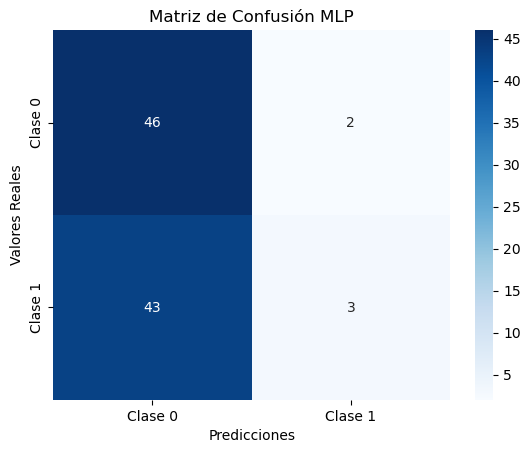


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.52      0.96      0.67        48
           1       0.60      0.07      0.12        46

    accuracy                           0.52        94
   macro avg       0.56      0.51      0.39        94
weighted avg       0.56      0.52      0.40        94



In [33]:
# 1️⃣ Predecir
y_pred_prob = model_mlp.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  # convertir a 0/1

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0','Clase 1'], yticklabels=['Clase 0','Clase 1'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión MLP')
plt.show()

# 3️⃣ Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Curva Roc-AUC con Red Neuronal 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


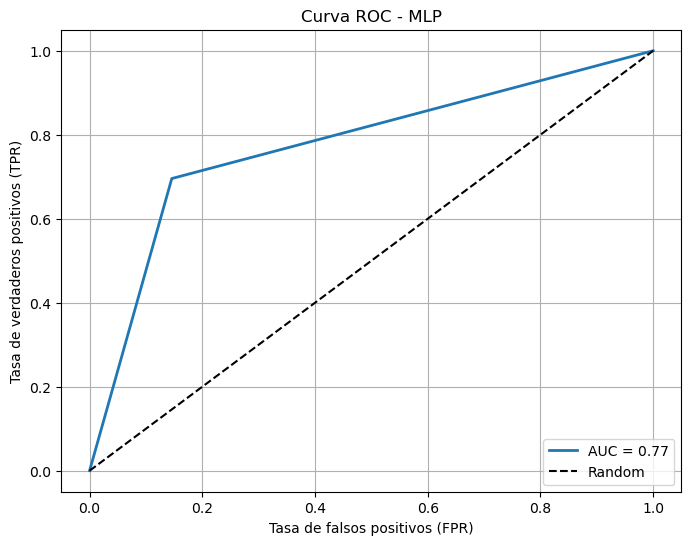

In [34]:
# Probabilidad de la clase positiva (1, por ejemplo "victoria")
y_probs_mlp = model_mlp.predict(X_test_scaled).ravel()  # ravel() para dejarlo 1D

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', linewidth=2)
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - MLP')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# XGB con ajuste de hiperparámetros

In [35]:

# 1. Crear el modelo XGB básico
model_xgb = xgb.XGBClassifier(random_state=42)

# 2. Definir la grilla de hiperparámetros
param_grid_xgb = {
    'n_estimators': [50, 100, 200, 300],          # cantidad de árboles
    'max_depth': [2, 3, 4, 5, 6],                 # profundidad máxima de cada árbol
    'learning_rate': [0.01, 0.05, 0.1, 0.2],     # velocidad de aprendizaje
    'subsample': [0.6, 0.8, 1.0],                 # proporción de datos para cada árbol
    'colsample_bytree': [0.6, 0.8, 1.0],          # proporción de features usadas en cada árbol
    'gamma': [0, 0.1, 0.2],                       # regularización para evitar sobreajuste
}

# 3. Configurar GridSearchCV
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid_xgb, scoring='accuracy', cv=5, n_jobs=-1)

# 4. Entrenar
grid_search_xgb.fit(X_train_scaled, y_train)

best_xgb = grid_search_xgb.best_estimator_
print("Mejores parámetros:", grid_search_xgb.best_params_)

Mejores parámetros: {'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}


# Matríz de confusión de XGB con hiperparámetros

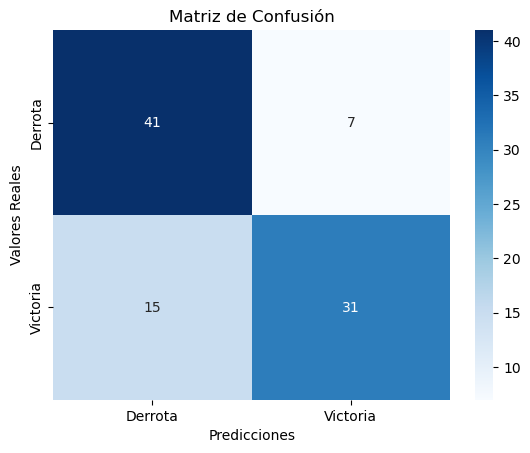


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        48
           1       0.82      0.67      0.74        46

    accuracy                           0.77        94
   macro avg       0.77      0.76      0.76        94
weighted avg       0.77      0.77      0.76        94



In [36]:
# 6. Predecir y evaluar

y_pred_xgb = best_xgb.predict(X_test_scaled)

# Crear un heatmap de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Derrota', 'Victoria'], yticklabels=['Derrota', 'Victoria'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))

# Curva Roc-AUC con XGB con hiperparámetros

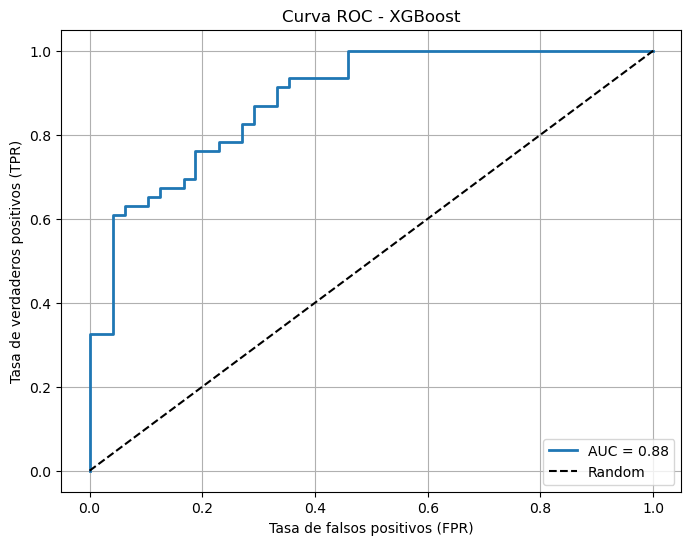

In [37]:
# 1️⃣ Obtener probabilidades de la clase positiva (1 = Victoria)
y_probs_xgb = best_xgb.predict_proba(X_test_scaled)[:, 1]  # tomar solo la columna de clase positiva

# 2️⃣ Calcular ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb)
auc = roc_auc_score(y_test, y_probs_xgb)

# 3️⃣ Graficar curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', linewidth=2)
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Top 7 Variables más relevantes para el modelo

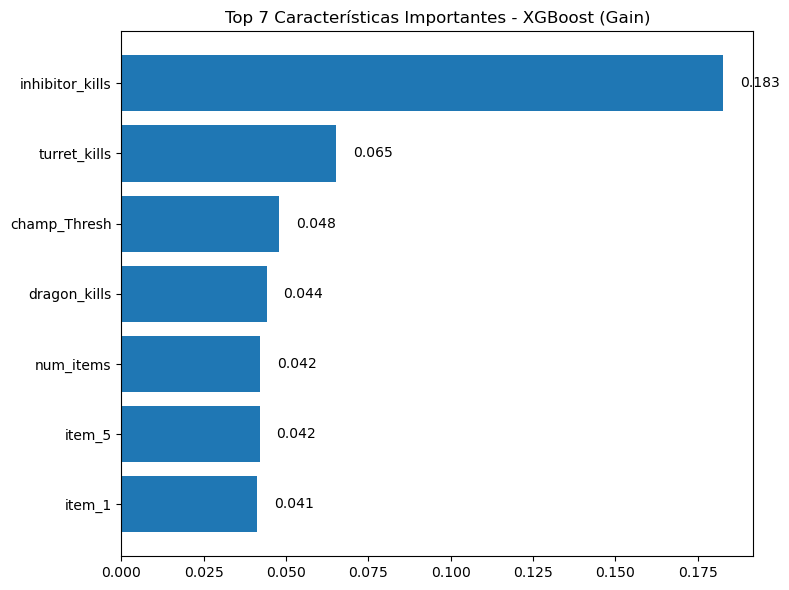

In [46]:
# Importancias del modelo XGBoost (gain por defecto)
importancias = best_xgb.feature_importances_

# Seleccionar el top 7
top_7_idx = np.argsort(importancias)[-7:][::-1]

# Obtener nombres de las features
nombres = X_train_scaled.columns[top_7_idx] if hasattr(X_train_scaled, 'columns') else [f'Feature_{i}' for i in top_7_idx]

# Gráfico con etiquetas numéricas
plt.figure(figsize=(8, 6))
bars = plt.barh(y=nombres, width=importancias[top_7_idx], color='#1f77b4')
plt.gca().invert_yaxis()  # Mayor importancia arriba
plt.title('Top 7 Características Importantes - XGBoost (Gain)')

# Agregar los valores numéricos a cada barra
for bar, value in zip(bars, importancias[top_7_idx]):
    plt.text(value + 0.005,               # un poquito a la derecha de la barra
             bar.get_y() + bar.get_height()/2, 
             f"{value:.3f}", va='center')

plt.tight_layout()
plt.show()


**Observaciones** 
Las variables que tiene  un mayor porcentaje de incidencia en la predicción de victoria son:

- Destrucción de inhibidores.
- Asesinato de dragones.
- Derribo de torretas.

Sin embargo, estas 3 variables son las predictoras más evidentes, dado que son objetivos principales y casi requerimientos para poder obtener una victoria. Por ello, es mejor dar énfasis a las variables que tienen relación al rendimiento del jugador:

- KDA
- Daño recibido
- 5to item
- wards per min

En estas variables es donde está el margen de mejora específico del jugador obtener una tasa más alta de victorias.

Hipotesis por variable:

- KDA: Lo más probale es que a mejor KDA mayor tasa de victorias, pero no necesariamente es así. Hay que corroborar.
  
- Daño recibido: Esto es probablemente por los roles/campeones jugados, dado que si son roles de tanque, es más probable que el daño recibido sea más alto dado que es la función principal de dicho rol.
  
- 5to item: Podemos detectar que el 5to item tiene una contribución del 4% en la predicción, lo que lleva a preguntarse, ¿por qué es relevante?. ¿Acaso las partidas que no duran lo suficiente para tener dicho item tiene mayor tasa de victorias?, o ¿depende del item que se utilice en la partida para ganar?.

- Wards por minuto: Lo más probale es que mientras más ward per min, mayor tasa de victorias. Hay que corroborar

# Validación de Hipotesis

## Validación 5to item

In [39]:
# Creamos un df nuevo
df_hipotesis = df_reducido.copy()

#Creamos la columna has item. Inica si se llegó a tener un 5to item en la partida o no
df_hipotesis["has_item5"] = (df_hipotesis["item_5"] > 0).astype(int)

In [40]:
# Creamos tabla dinámica para saber cuantas partidas se ganaron y perdieron comprando el 5to item o no
tabla_item = pd.crosstab(df_hipotesis['victoria'], df_hipotesis['has_item5'])
tabla_item

has_item5,0,1
victoria,,
0,61,98
1,33,121


In [41]:
# Creamos tabla dinámica para saber probabilidad de partidas que se ganaron y perdieron comprando el 5to item o no
tabla_quinto_item = pd.crosstab(df_hipotesis['victoria'], df_hipotesis['has_item5'],normalize='index')
tabla_quinto_item

has_item5,0,1
victoria,,
0,0.383648,0.616352
1,0.214286,0.785714


**Observaciones** 

- En un 80% de las victorias, se ganó teniendo el 5to item. Sin embargo, En un 60% de las derrotas, se perdieron teniendo el 5to item.
- En proporción, un 55% de los casos es victoria teniendo el item, es decir, existe una leve tendencia a ganar más partidas teniendo el 5to item que a perderlas.
- Podemos concluir que tener 5to item tiene influencia en al victoria de una partida

## Pero ¿Qué 5to item gana más partidas?

In [63]:
# Filtrar para ignorar item_5 = 0
df_items = df_hipotesis[df_hipotesis['item_5'] != 0]

# Agrupar por item 5
tabla_items = df_items.groupby('item_5').agg(
    partidas_usadas = ('victoria', 'count'),   # cuántas partidas usaste este ítem
    partidas_ganadas = ('victoria', 'sum')    # cuántas veces ganaste con este ítem
)

# Calcular win rate
tabla_items['win_rate'] = tabla_items['partidas_ganadas'] / tabla_items['partidas_usadas']

# Ordenar por cantidad de partidas usadas, de mayor a menor
tabla_items = tabla_items.sort_values(by='partidas_ganadas', ascending=False).reset_index()
tabla_items['win_rate'] = tabla_items['win_rate'].apply(lambda x: f"{x*100:.2f}%")
tabla_items = tabla_items[tabla_items['partidas_usadas'] >= 5]
tabla_items.head(13)

,item_5,partidas_usadas,partidas_ganadas,win_rate
0,3173,9,8,88.89%
1,3078,11,7,63.64%
2,3076,7,6,85.71%
3,3009,7,5,71.43%
4,6692,6,5,83.33%
5,1036,10,4,40.00%
6,1028,11,4,36.36%
7,1057,6,4,66.67%
8,3067,5,4,80.00%
9,3174,6,4,66.67%
